## load modules

In [42]:
# -*- coding: utf-8 -*-
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

# Parameters

In [43]:
p12 = 8 #p1=p2=p12 and V12(p12) = 6[ER^(lambda)]
p23 = 6.55 #p2=p3=p23 and V23(p23) = 6[ER^(lambda)]
p31 = 8.1 #p3=p1=p31 and V31(p31) = 6[ER^(lambda)]

v12 = 3 #desired V12 depth [ER^(lambda)] 
v23 = 3 #desired V23 depth [ER^(lambda)] 
v31 = 3 #desired V31 depth [ER^(lambda)] 

p1ini= 5.0 # Initial value of OL(H1) [mW]
alpha = 0.005 #gradient
nmax = 10000 #max interation number
r = 0.0001 #criterion [ER^(lambda)]

## Find optimal P1

converged
4.946729523283332 3.234460247864976 3.3160478651978615 9.984976905741405e-05


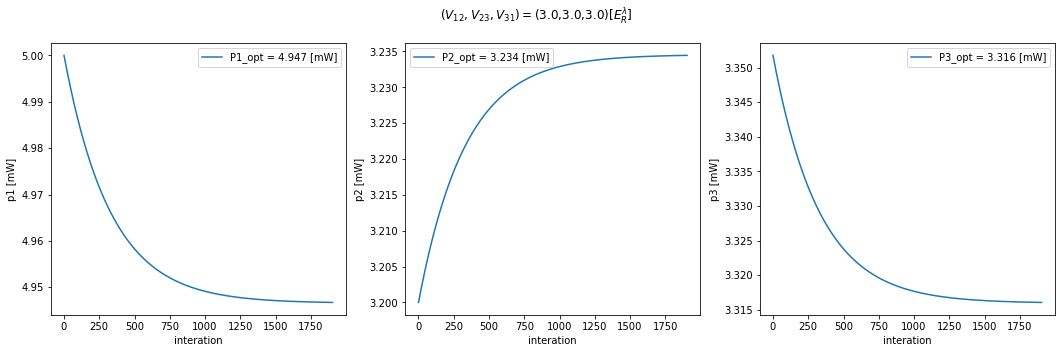

In [57]:
p1_list = []
p2_list = []
p3_list = []
diff_list = []
for i in range(nmax):
    if i == 0:
        p1_temp = p1ini
        p1_list.append(p1ini)
    else:
        p1_list.append(p1_temp)
    p2_temp = (v12*p12/6)**2/p1_temp
    p2_list.append(p2_temp)
    p3_temp = (v23*p23/6)**2/p2_temp
    p3_list.append(p3_temp)
    v31_temp = 6*np.sqrt(p3_temp*p1_temp)/p31
    diff_temp = v31_temp - v31
    diff_list.append(diff_temp)
    if i==nmax-1:
        print("reached max interation")
    elif np.abs(diff_temp) > r:
        p1_temp += - alpha*diff_temp
    elif np.abs(diff_temp) <= r:
        print("converged")
        break


print(p1_temp, p2_temp, p3_temp, diff_temp)

fig =plt.figure(figsize=[18,5])
title = r"($V_{12}, V_{23}, V_{31}) =$"
fig.suptitle(title + "(%.01f,%.01f,%.01f)"%(v12,v23,v31)+ r"$[E_R^{\lambda}]$")
ax1 = fig.add_subplot(1,3,1)
ax1.plot(p1_list, label='P1_opt = %.03f [mW]'%(p1_temp))
ax1.set_xlabel('interation')
ax1.set_ylabel('p1 [mW]')
ax1.legend()

ax2 = fig.add_subplot(1,3,2)
ax2.plot(p2_list, label='P2_opt = %.03f [mW]'%(p2_temp))
ax2.set_xlabel('interation')
ax2.set_ylabel('p2 [mW]')
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(p3_list,label='P3_opt = %.03f [mW]'%(p3_temp))
ax3.set_xlabel('interation')
ax3.set_ylabel('p3 [mW]')
ax3.legend()

